In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import systema_code as sac

In [15]:
#check whether the new equilibrium position was already found or not
def isnew(lst, newloc):
    
    if len(lst) == 0:
        return True
    
    else:
        for i in range(len(lst)):
            loc = lst[i] 
            
            dist = np.sqrt( (loc[0]-newloc[0])**2 + (loc[1]-newloc[1])**2)
            
            if dist > 1e-4:
                return True
            
            else: 
                pass
            
    return False

In [16]:
#obtain the equilibrium positions for a specific set of control parameters on the configuration space
def equilpos(r1 = 2.6, k3 = 0.84, fname = None):
    
    #set parameters for the calculation
    r2 = 2
    k1 = 1
    k2 = 1
    l1 = 6
    l2 = 6
    l3 = 10
    d = 20
    R = 10

    #r1 = 2
    #k3 = 0.96
    
    #define the grid
    numpoints = 61

    a1s = np.linspace( -np.pi, np.pi, numpoints)
    a2s = np.linspace( -np.pi, np.pi, numpoints)

    #create the potential
    U = sac.potprep(r1 = r1, r2 = r2, k1 = k1, k2 = k2, k3 = k3, l1 = l1, l2 = l2, l3 = l3, d = d, R = R)
    
    #define the number of random searches for a given point in the configuration space
    random_searches = 50

    #define the region in which we look for the equilibrium positions
    a = 10

    #define container for the equilibrium positions
    cords_allangles = []

    #go over the grid with a stepsize of 3 (not going over all the possible points)
    for idx in range(0, len(a1s), 3):
        for idy in range(0, len(a2s), 3):

            #define container for the equilibrium positions in the case of this point in the configuration space
            cords_angle = []

            #obtain the angles that characterise the point in the configuration space
            alpha = a1s[idx]
            beta = a2s[idy]

            #carry out random searches for the equilibrium position
            #NOTE the search is carried out using a scipy.optimize.minimize
            for i in range(random_searches):
                
                #create random initial point for the search
                x0, y0 = (np.random.rand(2)*a - a/2)
                
                #find the equilibrium position starting from the initial positions (x0, y0)
                minx, miny, potata1a2 = sac.mincords(pot = U, alpha1 = alpha, alpha2 = beta, x0 = x0, y0 = y0) 
                
                #check whether this equilibrium position was already found or not
                if isnew(lst = cords_angle, newloc = [minx,miny] ):
                    cords_angle.append([minx,miny])

                else:
                    pass
            
            #add the container to the larger contaier
            cords_allangles.append(cords_angle)
    
    #create figure
    fig = plt.figure()

    #plot the number of equilibrium positions for each point in the configuration space
    plt.scatter(np.arange(len(cords_allangles)), [len(cords_allangles[i]) for i in range(len(cords_allangles))])

    #add labels and ticklabels to the axis
    plt.xlabel("index", fontsize = 16)
    plt.ylabel("# Equil. pos.", fontsize = 16)

    plt.ylim([0.95,2+0.05])

    tickvals = [1, 2]
    ticklabels = [r"$1$", r"$2$"]

    plt.yticks(tickvals, ticklabels)
    
    #add title
    plt.title(fname, fontsize = 16)
    
    #save the figure
    if fname == None:
        pass
    else:
        plt.savefig("../figures/" + fname + ".svg", dpi = 1200, bbox_inches = "tight")
        
    plt.show()

### Check the number of equilibrium positions for the parameters of Fig2.equilpos(r1 = 2.6, k3 = 0.86)(b)

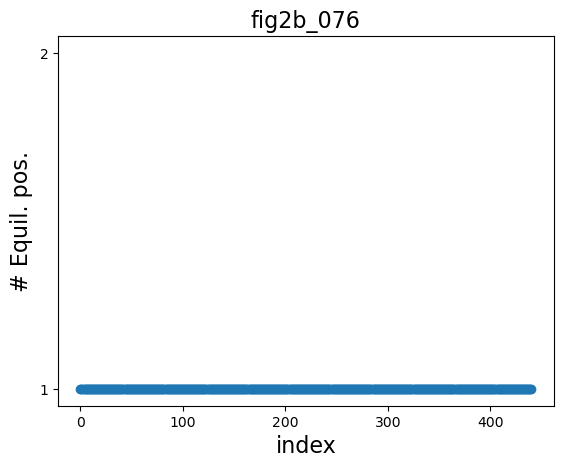

In [4]:
equilpos(r1 = 2.6, k3 = 0.76, fname = "fig2b_076")

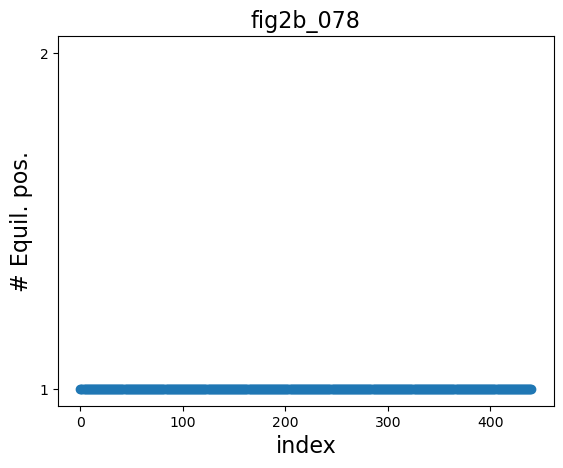

In [5]:
equilpos(r1 = 2.6, k3 = 0.78, fname = "fig2b_078")

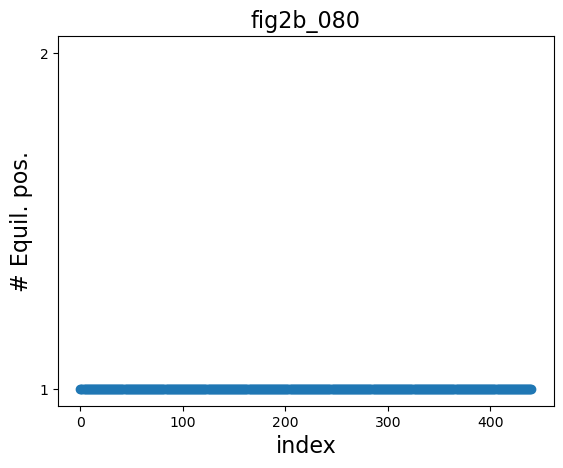

In [6]:
equilpos(r1 = 2.6, k3 = 0.8, fname = "fig2b_080")

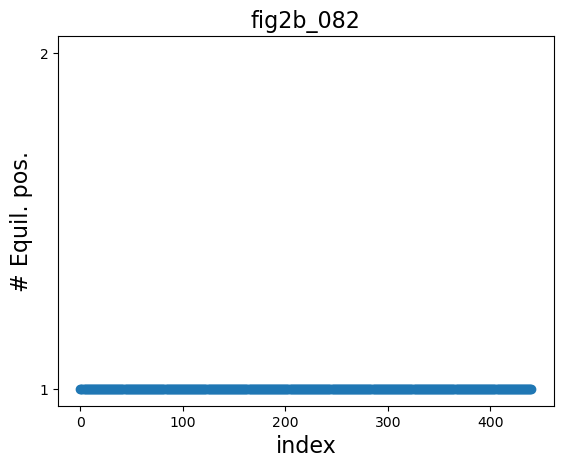

In [7]:
equilpos(r1 = 2.6, k3 = 0.82, fname = "fig2b_082")

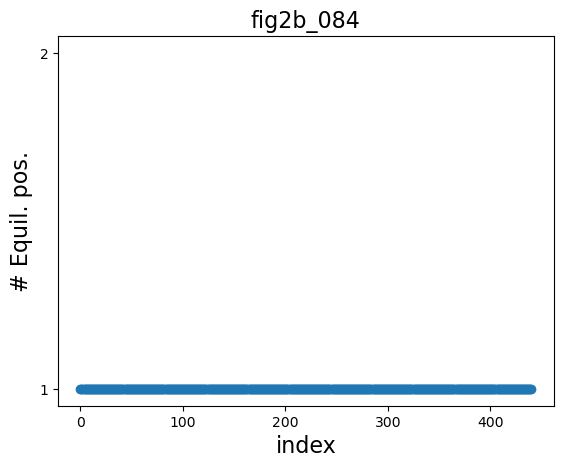

In [8]:
equilpos(r1 = 2.6, k3 = 0.84, fname = "fig2b_084")

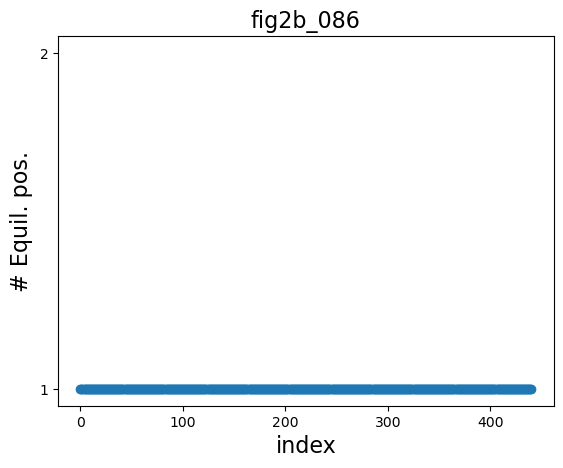

In [9]:
equilpos(r1 = 2.6, k3 = 0.86, fname = "fig2b_086")

### Check the number of equilibrium positions for the parameters of Fig3.(d)

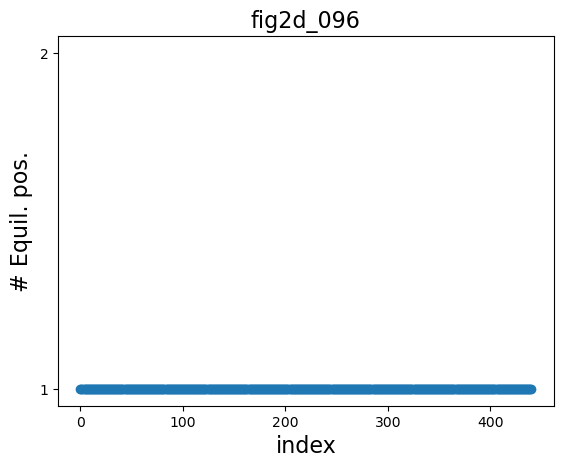

In [10]:
equilpos(r1 = 2, k3 = 0.96, fname = "fig2d_096")

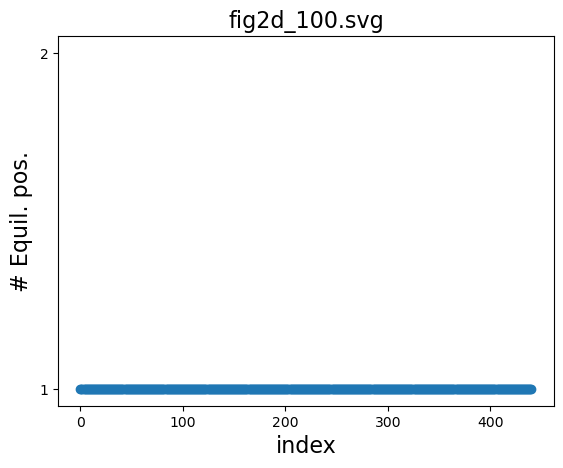

In [11]:
equilpos(r1 = 2, k3 = 1., fname = "fig2d_100.svg")

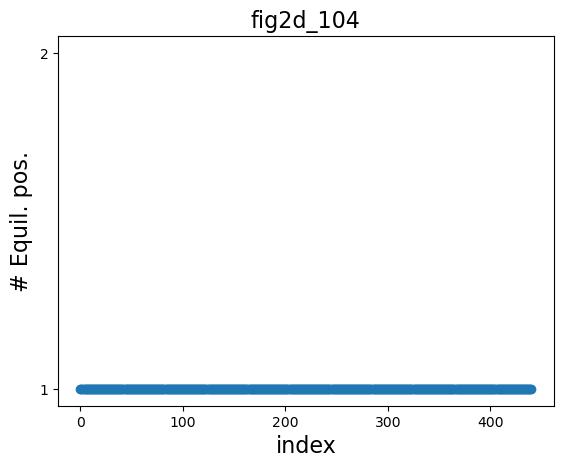

In [12]:
equilpos(r1 = 2, k3 = 1.04, fname = "fig2d_104")

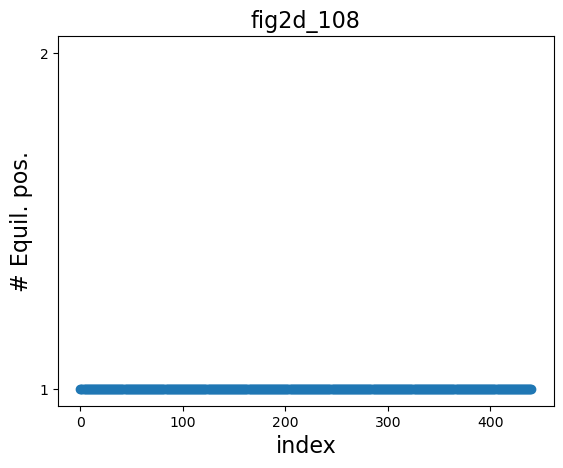

In [13]:
equilpos(r1 = 2, k3 = 1.08, fname = "fig2d_108")

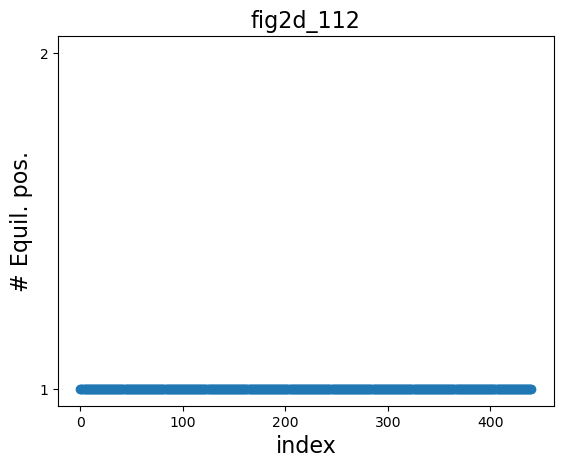

In [14]:
equilpos(r1 = 2, k3 = 1.12, fname = "fig2d_112")